In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import seaborn as sns
%matplotlib inline


In [11]:
data = pd.read_csv("zomato - zomato.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,Country,City,Address,Locality,Unnamed: 7,Unnamed: 8,Locality Verbose,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,PriceRange,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",NaN,NaN,"Century City Mall, Poblacion, Makati City, Mak...",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",NaN,NaN,"Little Tokyo, Legaspi Village, Makati City, Ma...",...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",NaN,NaN,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",NaN,NaN,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",NaN,NaN,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Number of Resturants Registered on Zomato by Country


In [12]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go
Temp = data['Country'].value_counts()
data1 = [go.Choropleth(
    locationmode='country names',
    locations=Temp.index.values,
    text=Temp.index,
    z=Temp.values
)]
layout = go.Layout(
    title='Number of Resturants Registered on Zomato by Country',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [13]:
data1 = [go.Bar(x=Temp.index,
            y=Temp.values)]
layout = go.Layout(
    title='Number of Resturants Registered on Zomato by Country',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# How do different countries rate on Zomato

In [14]:
Temp=(data.groupby(['Country'], as_index=False)['Aggregate rating'].mean())

data1 = ([go.Choropleth(
    locationmode='country names',
    locations=Temp['Country'],
    text=Temp['Country'],
    z=Temp['Aggregate rating']
)])
layout = go.Layout(
    title='Average Rating on Zomato by Country',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# Top 20 Popular Cusines on Zomato

In [15]:
Cusine_data=(data.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count())
Cusine_data.columns = ['Cuisines', 'Number of Resturants']
Cusine_data['Mean Rating']=(data.groupby(['Cuisines'], as_index=False)['Aggregate rating'].mean())['Aggregate rating']
#Cusine_data.sort_values(['Number of Resturants'],ascending=False).head(20)
TwentyMostPopularCusines = (Cusine_data.sort_values(['Number of Resturants'],ascending=False).head(20))['Cuisines']
Top20 = Cusine_data.sort_values(['Number of Resturants'],ascending=False).head(20)
Cusine_data.sort_values(['Number of Resturants'],ascending=False).head(20)

,Cuisines,Number of Resturants,Mean Rating
1306,North Indian,936,1.672329
1329,"North Indian, Chinese",511,2.421722
497,Chinese,354,2.042090
828,Fast Food,354,2.118362
1514,"North Indian, Mughlai",334,2.888623
331,Cafe,299,2.890970
177,Bakery,218,1.924312
1520,"North Indian, Mughlai, Chinese",197,2.568528
186,"Bakery, Desserts",170,2.317647
1749,Street Food,149,2.161745


# Number of Resturants on Zomato by Cuisines

In [16]:
data1 = ([go.Bar(x=Top20['Cuisines'],
    y=Top20['Number of Resturants'])])
layout = go.Layout(
    title='Number of Resturants on Zomato by Cuisines',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# How are these 20 Cuisines rated


In [17]:
DataForTwentyMostPopularCusines = (data[data['Cuisines'].isin(TwentyMostPopularCusines)])
TwentyMostPopularCusines= TwentyMostPopularCusines.reset_index()['Cuisines']

a=[None] * 20
b= [None] * 20
trace = [None] * 20
for i in range (0,20):
    TwentyMostPopularCusines[i]
    a[i]= DataForTwentyMostPopularCusines[DataForTwentyMostPopularCusines['Cuisines']==TwentyMostPopularCusines[i]]['Aggregate rating']
    b[i] =a[i].reset_index()['Aggregate rating']
    trace[i] = go.Box(
    y=b[i],
    name = TwentyMostPopularCusines[i],
        boxmean=True
    )
    
data1 = trace
layout = go.Layout(
    title='How are these 20 Cuisines rated ',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# Diving into India , as India has maximum data in Zomato Dataset

In [18]:
Data_India = data[data['Country']=='India']

# How many Resturants are registered on Zomato per city

In [19]:
Resturants_India = (Data_India.groupby(['City'], as_index=False)['Aggregate rating'].count()).sort_values(by='Aggregate rating',ascending=False)
Resturants_India.columns = ['City', 'Number of Resturants']

trace0 = go.Bar(
    x=Resturants_India['City'],
    y=Resturants_India['Number of Resturants'],
    )

data1 = [trace0]
layout = go.Layout(
    title='Number of Resturants on Zomato by City',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# How different cities in India rate on average

In [20]:
Resturants_India=(Data_India.groupby(['City'], as_index=False)['Aggregate rating'].mean()).sort_values(by='Aggregate rating',ascending=False)


trace0 = go.Bar(
    x=Resturants_India['City'],
    y=Resturants_India['Aggregate rating'],
    )

data1 = [trace0]
layout = go.Layout(
    title='Average Rating on Zomato by City',
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig)

# Price Range Prediction

In [21]:
df1=pd.concat([data[['Average Cost for two','Aggregate rating','PriceRange']]],axis=1)
df1.head()

,Average Cost for two,Aggregate rating,PriceRange
0,1100,4.8,3
1,1200,4.5,3
2,4000,4.4,4
3,1500,4.9,4
4,1500,4.8,4


In [22]:
data.groupby('PriceRange').size()

PriceRange
1    4444
2    3113
3    1408
4     586
dtype: int64

In [23]:
x=df1[['Average Cost for two','Aggregate rating']].values
y=df1.PriceRange
type(x)
type(y)
x.shape,y.shape

((9551, 2), (9551,))

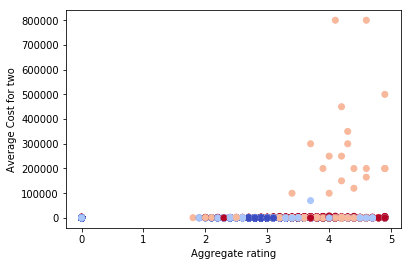

In [24]:
def visualize_data():
    plt.scatter(x[:,1],x[:,0],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('Aggregate rating')
    plt.ylabel('Average Cost for two')
    plt.show()
visualize_data()

In [25]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

/home/nirav/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



((7163, 2), (2388, 2), (7163,), (2388,))

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [27]:
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
y_pred= clf.predict(x_test)
print(y_pred)

[1 3 1 ..., 1 3 3]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.54      0.70      0.61      1066
          2       0.39      0.23      0.29       785
          3       0.03      0.05      0.04       379
          4       0.67      0.19      0.30       158

avg / total       0.42      0.41      0.39      2388



In [30]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.40787269681742044

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],
                      title='Confusion matrix')


plt.show()


NameError: name 'confusion_matrix' is not defined